<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

* ### Input Layer: aka visible layer. receives input from out dataset. one input per feature/column of our dataset.
* ### Hidden Layer: they are hidden because we don't actually see whats goin on. As if the whole thing is a self contained factory with an IN opening and an OUT opening. inside the factory is the hidden layers where things get done.
* ### Output Layer: What comes out. gives us what we want in a suitable output. Suitable is made possible by an activation function
* ### Neuron: The basic unit of a neural network. A neuron takes inputs, does some math with them, and produces one output.  
![](https://miro.medium.com/max/600/1*JRRC_UDsW1kDgPK3MW1GjQ.png)
* ### Weight: numbers that gives different features more or less significance.
* ### Bias: An inability for a machine learning function to represent data. Like how a straight line can't fit a curve
* ### Activation Function: Part of the output layer that translates the output into something comprehensible. A commonly used activation function is the sigmoid function.
![](https://miro.medium.com/max/700/1*Ul8Yu_r8GKSFillzbPFrPQ.png)
* ### Node Map:  the route that the data takes through the neural net. Shows all the different layers.
* ### Perceptron: our simple neural network


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### You give it an input, each input is multiplied by a weight, weights are added with a bias, then the sum is passed through an activation function to make it comprehensible.

## Write your own perceptron code that can correctly classify a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [0]:
import numpy as np
inputs = np.array([
    [0,0,1],
    [0,1,1],
    [1,0,1],
    [1,1,1]
])

truth = [[1],[1],[1],[0]]

2x4*2x1

In [0]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def sigmoid_derivate(x):
  sx = sigmoid(x)
  return sx * (1-sx)

In [0]:
weights = 2 * np.random.random((3,1)) - 1
weights

array([[-0.50078372],
       [ 0.15202893],
       [ 0.49078614]])

In [0]:
weighted_sum = np.dot(inputs,weights)
weighted_sum

array([[ 0.49078614],
       [ 0.64281507],
       [-0.00999759],
       [ 0.14203134]])

In [0]:
activated_output = sigmoid(weighted_sum)
activated_output

array([[0.62029161],
       [0.65538953],
       [0.49750062],
       [0.53544826]])

In [0]:
error = truth-activated_output
error

array([[ 0.37970839],
       [ 0.34461047],
       [ 0.50249938],
       [-0.53544826]])

In [0]:
adjustments = error * sigmoid_derivate(activated_output)
adjustments

array([[-0.11750186],
       [ 0.0733226 ],
       [ 0.14584063],
       [ 0.09889628]])

In [0]:
weights += np.dot(inputs.T, adjustments)
weights

array([[-0.18690359],
       [ 0.89083115]])

In [0]:
for iteration in range(10000):
  #weighted sum of inputs/weights
  weighted_sum = np.dot(inputs,weights)
  
  #activate!
  activated_output = sigmoid(weighted_sum)
  
  #calculate error
  error = truth - activated_output
  
  #adjustments
  adjustments = error * sigmoid_derivate(activated_output)
  
  weights+= np.dot(inputs.T, adjustments)
  
print('Weights after training')
print(weights)

print('output after training')
print(activated_output)

Weights after training
[[-11.84013315]
 [-11.84013315]
 [ 17.80906419]]
output after training
[[0.99999998]
 [0.99744929]
 [0.99744929]
 [0.00281184]]


## Implement your own Perceptron Class and use it to classify a binary dataset like: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 
- [Titanic](https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv)
- [A two-class version of the Iris dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Iris.csv)

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [0]:
import pandas as pd

url = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')

  

In [0]:
class Perceptron(object):
  def __init__(self, rate = 0.01, niter = 10):
    self.rate = rate
    self.niter = niter

  def fit(self, X, y):
    """Fit training data
    X : Training vectors, X.shape : [#samples, #features]
    y : Target values, y.shape : [#samples]
    """

    # weights
    self.weight = np.zeros(1 + X.shape[1])

    # Number of misclassifications
    self.errors = []  # Number of misclassifications

    for i in range(self.niter):
      err = 0
      for xi, target in zip(X, y):
        delta_w = self.rate * (target - self.predict(xi))
        self.weight[1:] += delta_w * xi
        self.weight[0] += delta_w
        err += int(delta_w != 0.0)
      self.errors.append(err)
    return self

  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.weight[1:]) + self.weight[0]

  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.net_input(X) >= 0.0, 1, -1)

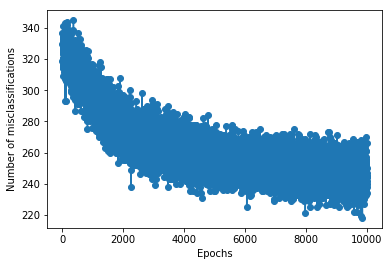

In [0]:
import matplotlib.pyplot as plt

target = 'Outcome'
X = url.drop(columns=target).values
y = url[target] * 2 - 1

pn = Perceptron(0.1, 10000)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?